<a href="https://colab.research.google.com/github/irenechau31/PYTHON/blob/main/Python_Pandas_Package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np #to use cumsum

USE [ ] FOR ARRAY

Series are 1D array-like objects with a
sequence of values and an associated
array of data labels (its index)

In [ ]:
obj=pd.Series([112,107,104,119])
obj

0    112
1    107
2    104
3    119
dtype: int64

In [ ]:
obj2=pd.Series([112,107,104,119],index=['c','b','a','d'])
obj2

c    112
b    107
a    104
d    119
dtype: int64

In [ ]:
obj2.index

Index(['c', 'b', 'a', 'd'], dtype='object')

In [ ]:
obj2['b'] #subtract data corresponded to the given index

107

In [ ]:
obj2[['b','c']]

b    107
c    112
dtype: int64

In [ ]:
obj2[['b','c']] =101 # change data in index b,c to 101
obj2

c    101
b    101
a    104
d    119
dtype: int64

In [ ]:
obj2/12 #devide data in 1D-array obj2 by 12

c    8.416667
b    8.416667
a    8.666667
d    9.916667
dtype: float64

In [ ]:
np.cumsum(obj2) # c+0 =101, b+c=202, a+b+c =306, d+a+b+c = 425

c    101
b    202
a    306
d    425
dtype: int64

In [ ]:
obj2[obj2<105] #include data < 105 only

c    101
b    101
a    104
dtype: int64


CREATING **SEARIES** FROM **DICTIONARY**

• We can simplyconvert a dictionary to series.

• One can supply new index labels as well.

• .isnull() method returns True for NaN

In [ ]:
#in R will state they are not in the same length
#in Python will try to match the index

#R array cannot has different type of data
# python array can hold different type of data

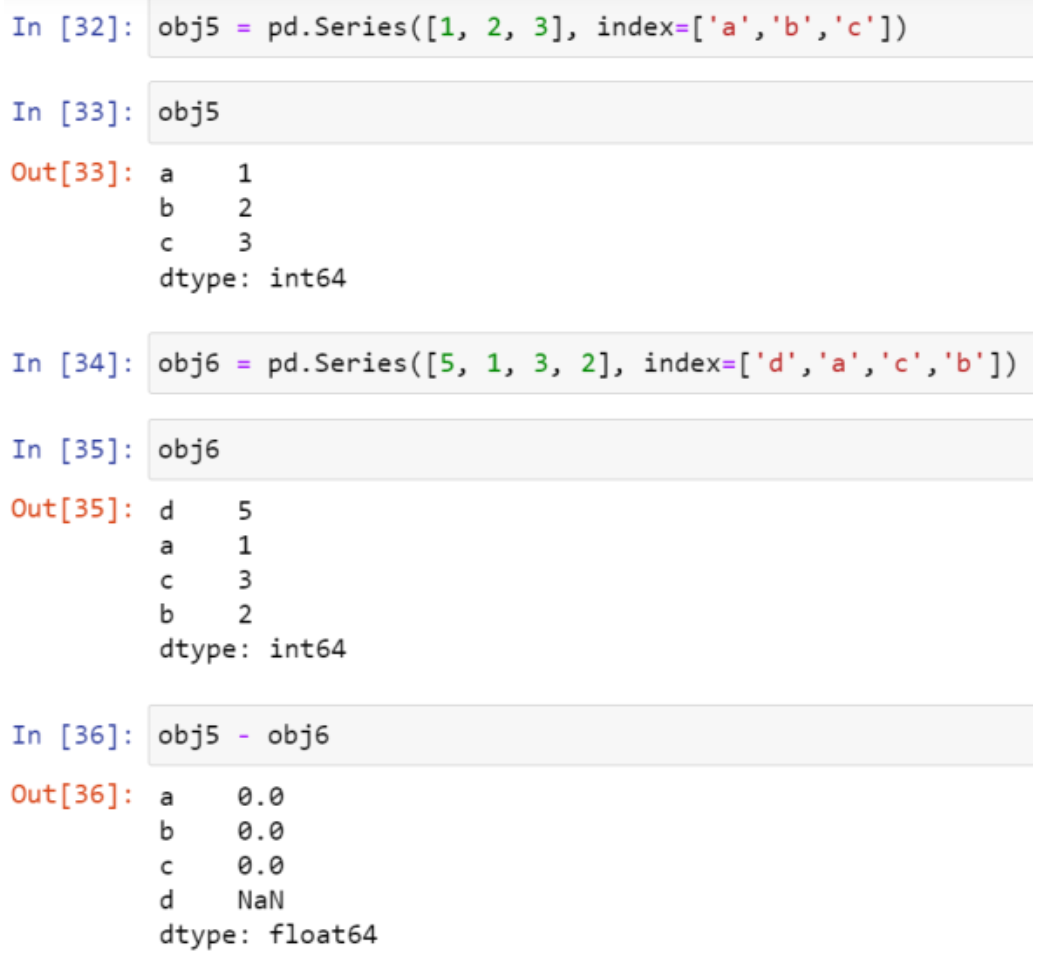

In [ ]:
np.random.seed(1)

In [ ]:
data=pd.Series(np.random.poisson(2,size=25))
data

0     2
1     1
2     0
3     1
4     2
5     2
6     0
7     3
8     3
9     3
10    0
11    2
12    4
13    2
14    4
15    0
16    2
17    1
18    0
19    2
20    1
21    1
22    2
23    2
24    0
dtype: int64

In [ ]:
freq_table=data.value_counts()
freq_table

2    9
0    6
1    5
3    3
4    2
dtype: int64

In [ ]:
freq_table_sorted=freq_table.sort_values()
freq_table_sorted

4    2
3    3
1    5
0    6
2    9
dtype: int64

In [ ]:
most_frequent=freq_table_sorted[-2:].index
most_frequent

Int64Index([0, 2], dtype='int64')

In [ ]:
mask=data.isin(most_frequent)#if we use [] we are looking for a list inside the data
mask

0      True
1     False
2      True
3     False
4      True
5      True
6      True
7     False
8     False
9     False
10     True
11     True
12    False
13     True
14    False
15     True
16     True
17    False
18     True
19     True
20    False
21    False
22     True
23     True
24     True
dtype: bool

In [ ]:
result=data[mask]
result

0     2
2     0
4     2
5     2
6     0
10    0
11    2
13    2
15    0
16    2
18    0
19    2
22    2
23    2
24    0
dtype: int64

In [ ]:
import pandas as pd
import numpy as np

import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()

In [ ]:
#Import stock price data

all_data = {ticker: pdr.get_data_yahoo(ticker, "2022-04-03", "2023-04-04")
           for ticker in ['AAPL','IBM','MSFT','GOOG']}

price = pd.DataFrame({ticker: data['Adj Close']
                      for ticker, data in all_data.items()})

#compute log return, defined as log(price_[ t ]/price[ t-1 ])
returns = np.log(1+price.pct_change())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2023-03-28,-0.003988,0.000232,-0.004170,-0.016633
2023-03-29,0.019597,0.002857,0.019002,0.005313
2023-03-30,0.009841,-0.003785,0.012541,-0.005708
2023-03-31,0.015523,0.014368,0.014851,0.026107
2023-04-03,0.007672,0.007372,-0.003718,0.008712


Using .LOC method to subtract data for a specific range from original data frame
DATA.LOC[COLUMNS,:ROW]


In [ ]:
#Using .loc method, create a NEW copy of data frame for the stocks 'AAPL', 'IBM', and 'MSFT',
#and for the dates from '2023-01-02' to '2023-11-06'
returns_2023 = returns.loc['2023-01-02':'2023-11-06',:'MSFT']
returns_2023


,AAPL,IBM,MSFT
Date,,,
2023-01-03,-0.038122,0.004674,-0.001001
2023-01-04,0.010261,0.007390,-0.044729
2023-01-05,-0.010661,-0.010504,-0.030086
2023-01-06,0.036133,0.018188,0.011716
2023-01-09,0.004081,-0.001044,0.009689
...,...,...,...
2023-03-28,-0.003988,0.000232,-0.004170
2023-03-29,0.019597,0.002857,0.019002
2023-03-30,0.009841,-0.003785,0.012541


In [ ]:
#Create a new column indicating the days with positive returns for 'AAPL'

returns_2023['positive_AAPL']=returns_2023['AAPL']>0
returns_2023

,AAPL,IBM,MSFT,positive_AAPL
Date,,,,
2023-01-03,-0.038122,0.004674,-0.001001,False
2023-01-04,0.010261,0.007390,-0.044729,True
2023-01-05,-0.010661,-0.010504,-0.030086,False
2023-01-06,0.036133,0.018188,0.011716,True
2023-01-09,0.004081,-0.001044,0.009689,True
...,...,...,...,...
2023-03-28,-0.003988,0.000232,-0.004170,False
2023-03-29,0.019597,0.002857,0.019002,True
2023-03-30,0.009841,-0.003785,0.012541,True


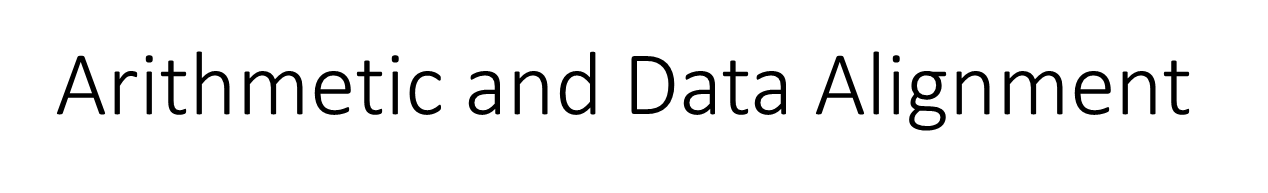

In [5]:
import numpy as np
import pandas as pd


In [7]:
s1=pd.Series(np.random.randn(5),index=range(5))
s1

0   -0.542194
1   -0.938853
2    1.389688
3   -1.077856
4    0.705257
dtype: float64

In [9]:
s2=pd.Series(np.random.randn(5), index=range(2,7)) #range 2,7 -> run form 2 to 6
s2

2   -1.351353
3   -1.232919
4    0.077639
5   -0.286486
6    0.546607
dtype: float64

In [10]:
s1+s2 #Python tried to match index => non-matching index returns NaN

0         NaN
1         NaN
2    0.038335
3   -2.310775
4    0.782895
5         NaN
6         NaN
dtype: float64

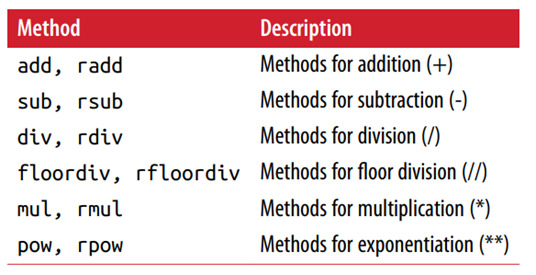

To avoid NaN:
-> add method and a FILL_VALUE = 0

In [11]:
df1=pd.DataFrame(np.arange(12.).reshape(3,4)),columns=list('abcd') #row 3, column 4
df1

SyntaxError: ignored

In [20]:
df2=pd.DataFrame(np.arange(20.).reshape(4,5)),columns=list('abcd')
df2 # #row 3, column

SyntaxError: ignored

Using .LOC method to subtract data for a specific range from original data frame
DATA.LOC[COLUMNS,:ROW]


In [13]:
df2.loc[1,'b']=np.nan

NameError: ignored

In [21]:
df1+df2

NameError: ignored

In [23]:
df1.add(df2,fill_value=0) #add df2 to df1, fill out NaN by the value in df2

NameError: ignored

NumPy UFUNCS (element-wise functions on arrays) also work on pandas objects.


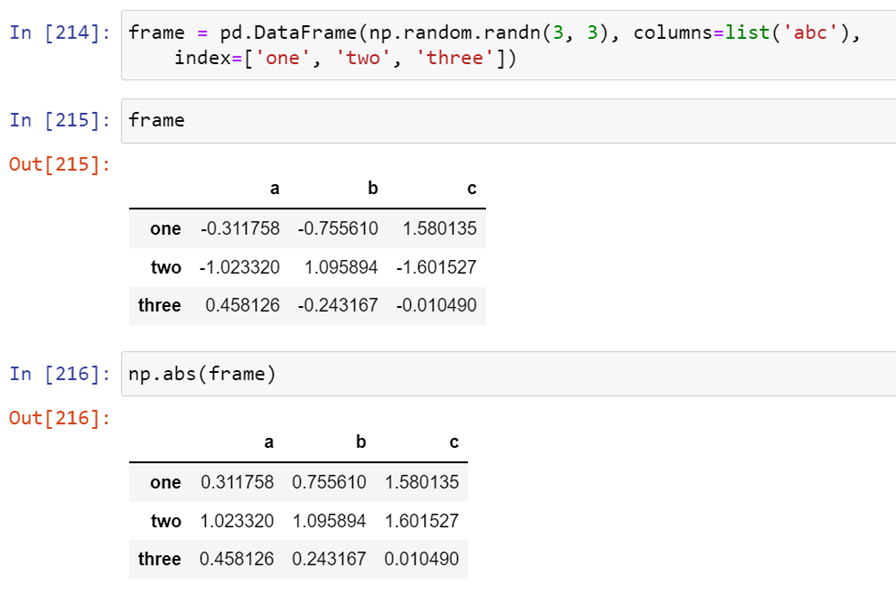

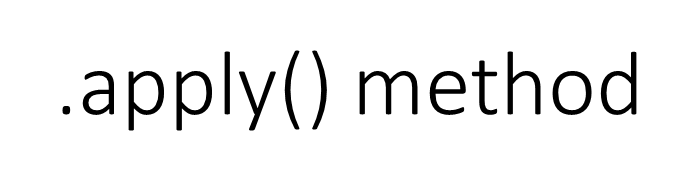

Specify axis=1 (or equivalently  axis=‘column’) to apply on each row

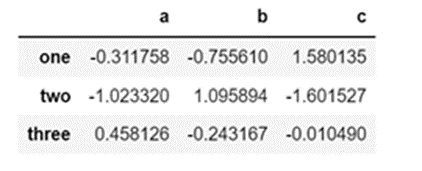

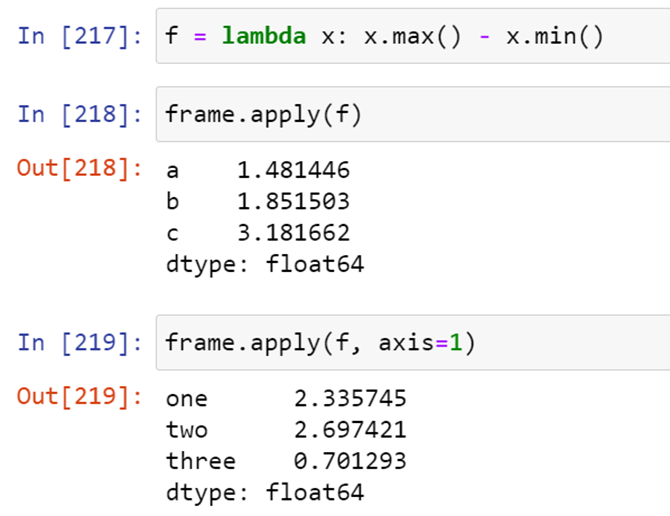

in R defines function in structure func name: function

In [24]:
import pandas as pd
import numpy as np

import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()

In [25]:
#Import stock price data

all_data = {ticker: pdr.get_data_yahoo(ticker, "2022-04-03", "2023-04-04")
           for ticker in ['AAPL','IBM','MSFT','GOOG']}

price = pd.DataFrame({ticker: data['Adj Close']
                      for ticker, data in all_data.items()})

#compute log return, defined as log(price_[ t ]/price[ t-1 ])
returns = np.log(1+price.pct_change())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [26]:
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2023-03-28,-0.003988,0.000232,-0.004170,-0.016633
2023-03-29,0.019597,0.002857,0.019002,0.005313
2023-03-30,0.009841,-0.003785,0.012541,-0.005708
2023-03-31,0.015523,0.014368,0.014851,0.026107
2023-04-03,0.007672,0.007372,-0.003718,0.008712


In [27]:
#Using .loc method, create a NEW copy of data frame for the stocks 'AAPL', 'IBM', and 'MSFT',
#and for the dates from '2023-01-02' to '2023-11-06'
returns_2023 = returns.loc['2023-01-02':'2023-11-06',:'MSFT']
returns_2023


,AAPL,IBM,MSFT
Date,,,
2023-01-03,-0.038122,0.004674,-0.001001
2023-01-04,0.010261,0.007391,-0.044729
2023-01-05,-0.010661,-0.010504,-0.030086
2023-01-06,0.036133,0.018188,0.011716
2023-01-09,0.004081,-0.001044,0.009689
...,...,...,...
2023-03-28,-0.003988,0.000232,-0.004170
2023-03-29,0.019597,0.002857,0.019002
2023-03-30,0.009841,-0.003785,0.012541


In [49]:
#Create a new column indicating the days with positive returns for 'AAPL'

returns_2023['positive_AAPL']=returns_2023['AAPL']>0
returns_2023

,AAPL,IBM,MSFT,positive_AAPL
Date,,,,
2023-01-03,-0.038122,0.004674,-0.001001,False
2023-01-04,0.010261,0.007391,-0.044729,True
2023-01-05,-0.010661,-0.010504,-0.030086,False
2023-01-06,0.036133,0.018188,0.011716,True
2023-01-09,0.004081,-0.001044,0.009689,True
...,...,...,...,...
2023-03-28,-0.003988,0.000232,-0.004170,False
2023-03-29,0.019597,0.002857,0.019002,True
2023-03-30,0.009841,-0.003785,0.012541,True


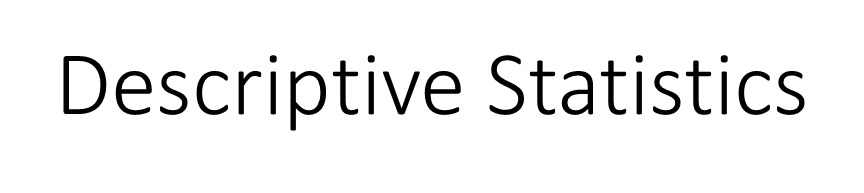 in panda package

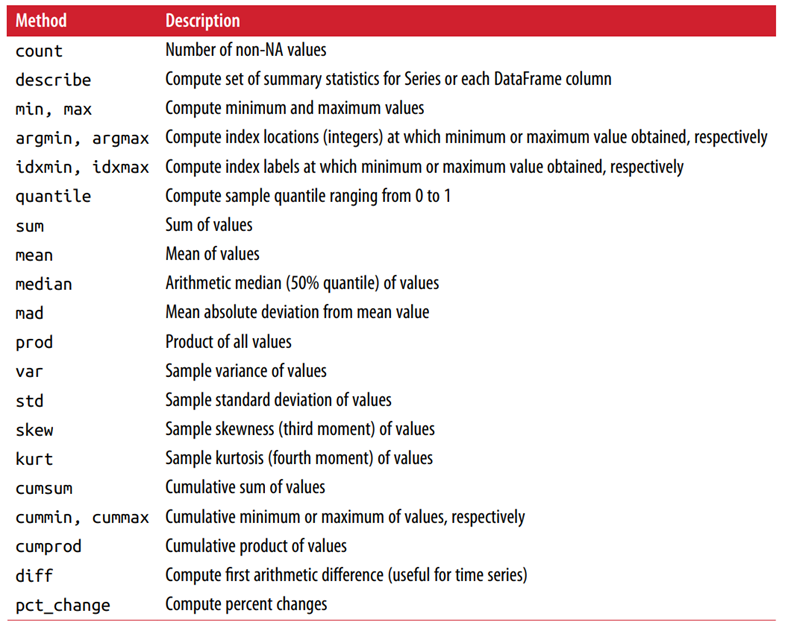

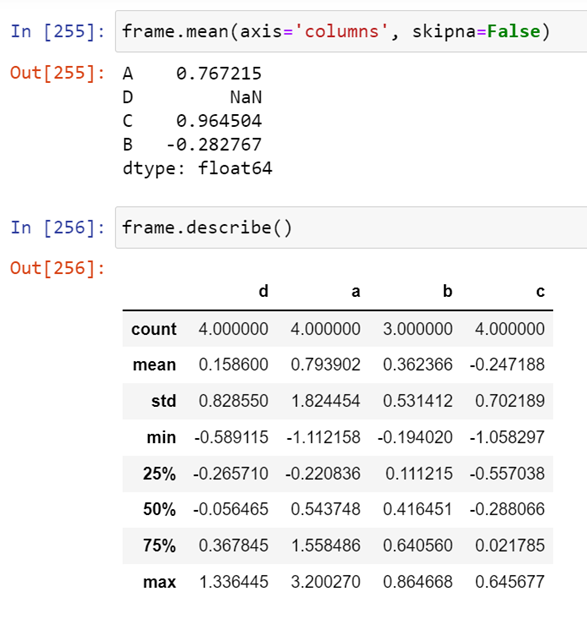

In [51]:
del returns_2023['positive_AAPL']
returns_2023

,AAPL,IBM,MSFT
Date,,,
2023-01-03,-0.038122,0.004674,-0.001001
2023-01-04,0.010261,0.007391,-0.044729
2023-01-05,-0.010661,-0.010504,-0.030086
2023-01-06,0.036133,0.018188,0.011716
2023-01-09,0.004081,-0.001044,0.009689
...,...,...,...
2023-03-28,-0.003988,0.000232,-0.004170
2023-03-29,0.019597,0.002857,0.019002
2023-03-30,0.009841,-0.003785,0.012541


In [52]:
#Create summary for each column
returns_2023.describe()

,AAPL,IBM,MSFT
count,63.000000,63.000000,63.000000
mean,0.003929,-0.000834,0.002903
std,0.015158,0.011875,0.018958
min,-0.038122,-0.045864,-0.044729
25%,-0.006202,-0.005600,-0.009335
50%,0.006945,0.000148,0.003014
75%,0.013899,0.004832,0.015680
max,0.036392,0.031582,0.045818


In [53]:
#compute the mean over three stocks for each DAY
#the result must be a series with length of 212
daily_mean = returns_2023.mean(axis=1, skipna=False)
daily_mean

Date
2023-01-03   -0.011483
2023-01-04   -0.009026
2023-01-05   -0.017084
2023-01-06    0.022013
2023-01-09    0.004242
                ...   
2023-03-28   -0.002642
2023-03-29    0.013819
2023-03-30    0.006199
2023-03-31    0.014914
2023-04-03    0.003775
Length: 63, dtype: float64

In [64]:
#Define a function with lambda that computes the difference between the min and max for a given series
f=lambda x: x.max()-x.min()

In [65]:
return_diff=returns_2023.apply(f,axis=1)
return_diff

Date
2023-01-03    0.042796
2023-01-04    0.054990
2023-01-05    0.019582
2023-01-06    0.024417
2023-01-09    0.010734
                ...   
2023-03-28    0.004402
2023-03-29    0.016741
2023-03-30    0.016326
2023-03-31    0.001155
2023-04-03    0.011390
Length: 63, dtype: float64

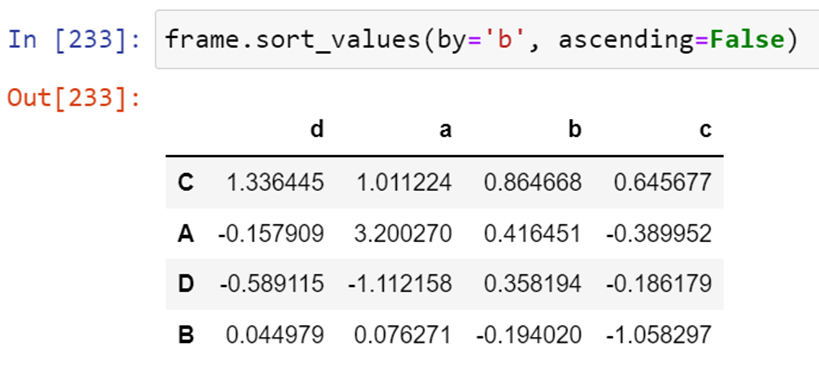

In [86]:
#Rank the resulting series in descending order according to the computed max - min
#Use the default way to break the tie
return_diff_rank = return_diff.sort_values(ascending=False)
return_diff_rank


Date
2023-01-26    0.076115
2023-01-04    0.054990
2023-02-03    0.048011
2023-03-27    0.046628
2023-03-20    0.044132
                ...   
2023-03-28    0.004402
2023-03-07    0.004368
2023-01-10    0.004224
2023-01-25    0.001214
2023-03-31    0.001155
Length: 63, dtype: float64

In [96]:
#Find the top10 days in terms of difference
top10 = return_diff_rank[return_diff_rank<=10]
print(top10)

Date
2023-01-26    0.076115
2023-01-04    0.054990
2023-02-03    0.048011
2023-03-27    0.046628
2023-03-20    0.044132
                ...   
2023-03-28    0.004402
2023-03-07    0.004368
2023-01-10    0.004224
2023-01-25    0.001214
2023-03-31    0.001155
Length: 63, dtype: float64


In [95]:
#Check if the Q4 earnings release date, January 26th is among the top 10 dates.

#The result should be True or False

Q4_earnings_date = pd.to_datetime("2023-01-26")
Q4_earnings_date in top10


True

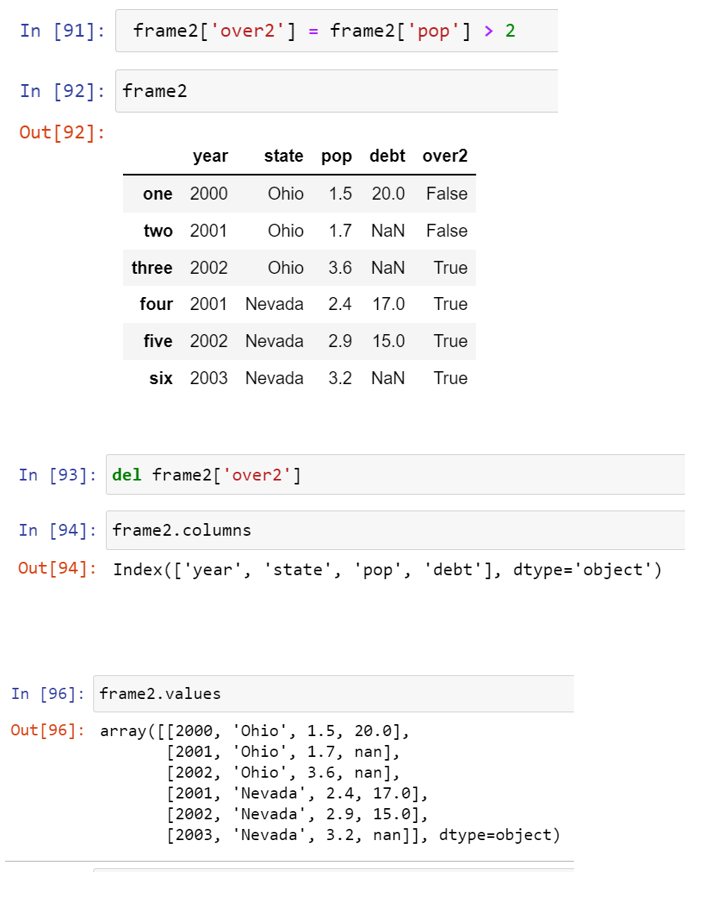